
<h1 align='center'><b>Predicting Profits for startups</b></h1>

<h3><b>Introduction:</b>
<p>This project is for predicting profits for startup companies in USA particularly in New York, California, Florida.</p>
<p>We have a data set which provides different variables of 50 startups that are already present. If new companies are coming up with same variables and they want to know beforehand what may be their probable profit earnings according to the investment in different departments then this project will help them.</p>

<b>Data Section</b>
<p>We have following variables in our data:</p>
<li><b>RD_Spend:</b>investment on R&D Dept. (USD)</li>
<li><b>Administration:</b>investment on administration Dept. (USD)</li>
<li><b>Marketing_Spend:</b>investment on Marketing Dept. (USD)</li>
<li><b>State:</b>State in which startup is located</li>
<li><b>Profit:</b>Profit gained from all the investments made (USD)</li>

<b>Methodology</b>
<li><b>Importing Data set</b></li>
<li><b>EDA and Visualization</b></li>
<li><b>Train Test split</b></li>
<li><b>Modelling using sklearn</b></li>
<li><b>Evaluation</b></li>
<li><b>Modelling using statsmodel</b></li>

<b>Importing Data set 

In [1]:
#importing basic necessary libraries
import pandas as pd
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import files
uploaded = files.upload()

Saving 50_Startups.csv to 50_Startups.csv


In [3]:
import io
df = pd.read_csv(io.BytesIO(uploaded['50_Startups.csv']))
# Dataset is now stored in a Pandas Dataframe

In [4]:
df.head(10)

,RD_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [12]:
df.dtypes

RD_Spend           float64
Administration     float64
Marketing_Spend    float64
State               object
Profit             float64
dtype: object

In [13]:
df.shape

(50, 5)

<b>Exploratory Data Analysis and Data Visualization</b> 

In [5]:
#To check mean,median and other standard information about dataset
#BOXPLOT
#25%:Q1
#50%:Q2
#75%:Q3
df.describe()

,RD_Spend,Administration,Marketing_Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [8]:
#Finding skewness
#-0.5 to 0.5:fairly symmetrical
#(-1 to 0.5) & (0.5 to 1):moderately skewed
#less than -1 or greater than 1:data are highly skewed
#Here all are fairly symmetrical
df.skew()

RD_Spend           0.164002
Administration    -0.489025
Marketing_Spend   -0.046472
Profit             0.023291
dtype: float64

In [7]:
#Finding Kurtosis
#3:mesokurtic (std tail and zero excess distribution)
#<3:platykurtic (thin tail negative excess distribution)
#>3:leptokurtic (fat tailed and positive excess distribution) 
df.kurt()

RD_Spend          -0.761465
Administration     0.225071
Marketing_Spend   -0.671701
Profit            -0.063859
dtype: float64

<b>Data Visualization

In [30]:
df_plot = df.iloc[:,[0,1,2]]
df_plot.head()

,RD_Spend,Administration,Marketing_Spend
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


<b>Barplot

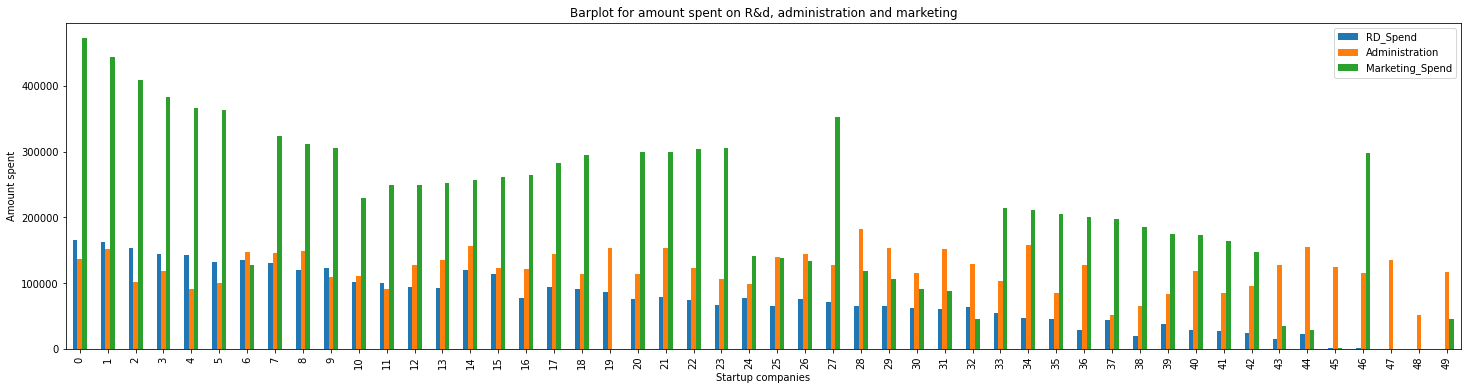

In [32]:
df_plot.plot(kind='bar',figsize=(25,6))
plt.xlabel('Startup companies')
plt.ylabel('Amount spent')
plt.title('Barplot for amount spent on R&d, administration and marketing')
plt.show()

<b>Histogram

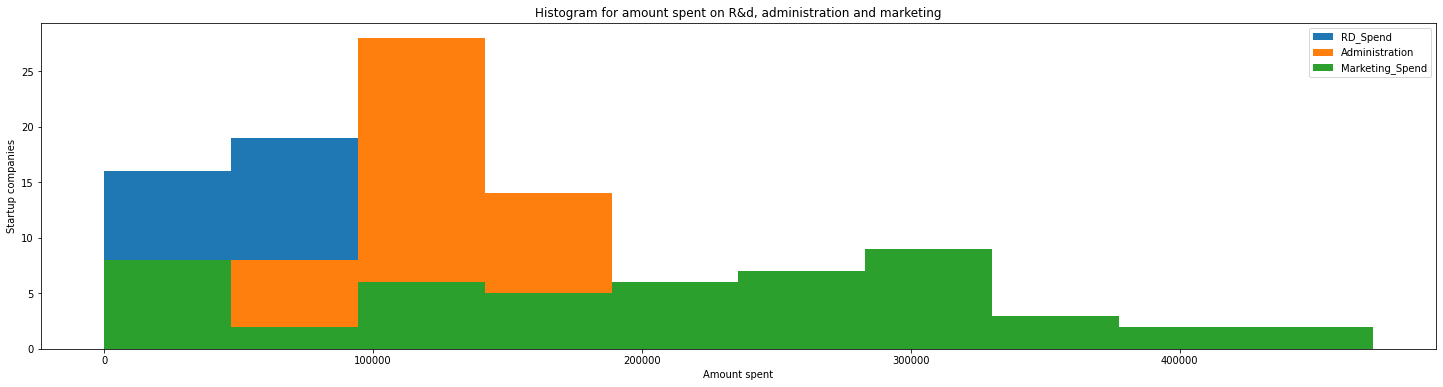

In [34]:
df_plot.plot(kind='hist',figsize=(25,6))
plt.xlabel('Amount spent')
plt.ylabel('Startup companies')
plt.title('Histogram for amount spent on R&d, administration and marketing')
plt.show()

<b>Boxplot

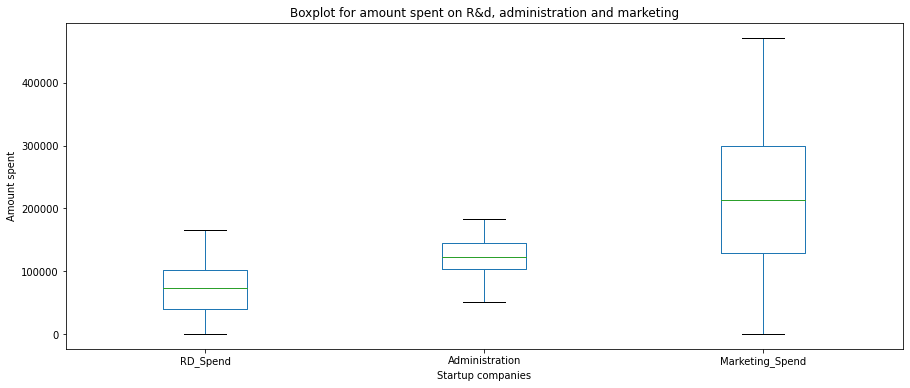

In [37]:
df_plot.plot(kind='box',figsize=(15,6))
plt.xlabel('Startup companies')
plt.ylabel('Amount spent')
plt.title('Boxplot for amount spent on R&d, administration and marketing')
plt.show()

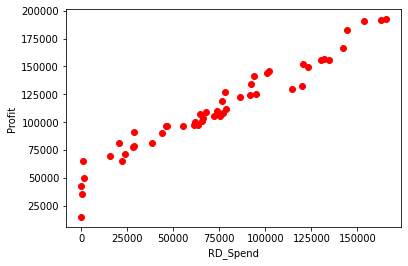

In [38]:
plt.scatter(df.RD_Spend,df.Profit,color='red')
plt.xlabel('RD_Spend')
plt.ylabel('Profit')
plt.show()
#Positive,strong and Linear correlation

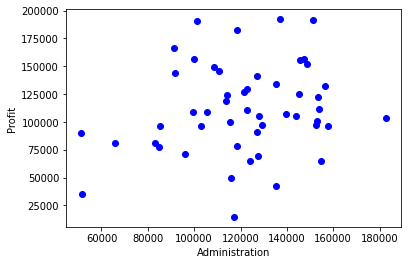

In [39]:
plt.scatter(df.Administration,df.Profit,color='blue')
plt.xlabel('Administration')
plt.ylabel('Profit')
plt.show()
#no correlation

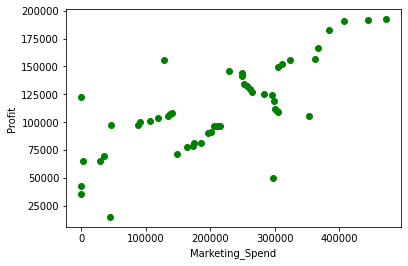

In [40]:
plt.scatter(df.Marketing_Spend,df.Profit,color='green')
plt.xlabel('Marketing_Spend')
plt.ylabel('Profit')
plt.show()
#positive, moderately linear correlation

Importing seaborn for beautification and also for finding catterplots together for each column against each other.

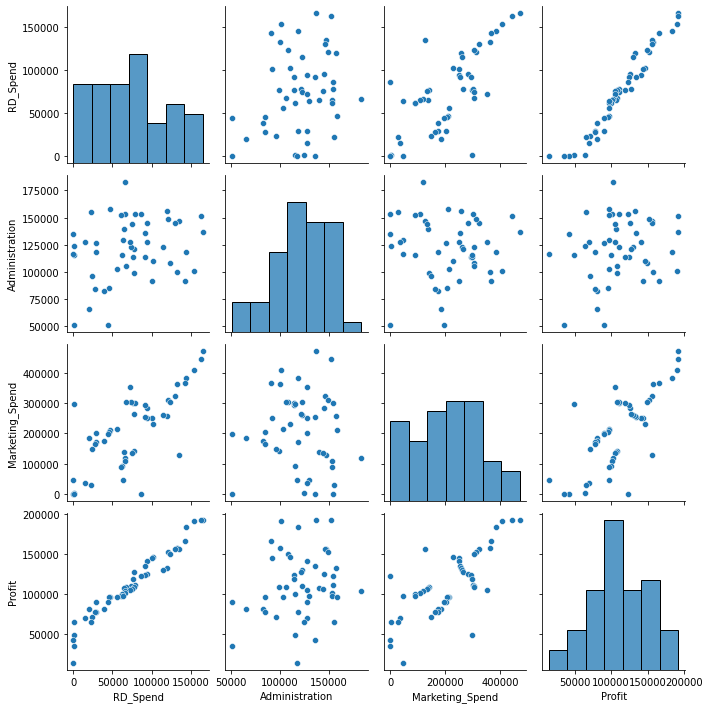

In [45]:
import seaborn as sns
sns.pairplot(df)

Correlation value

In [46]:
df.corr()

,RD_Spend,Administration,Marketing_Spend,Profit
RD_Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing_Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [51]:
from sklearn.preprocessing import LabelEncoder

In [52]:
LE = LabelEncoder()

In [53]:
df['State'] = LE.fit_transform(df['State'].astype('str'))
df.head()

,RD_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


<b>Training And Testing split

Choosing the right variable as predictors and target.</br>
Here the target is Profit and others are predictors.</br>
X:Predictors, Y:Target 

In [54]:
X = df.iloc[:,[0,1,2,3]].values
Y = df.iloc[:,[4]].values

In [58]:
print('shape of X:',X.shape)
print('shape of Y:',Y.shape)

shape of X: (50, 4)
shape of Y: (50, 1)


Now selecting X_test and Y_test as testing data and X_train and Y_train as training data.

In [59]:
from sklearn.model_selection import train_test_split

In [61]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.1,random_state=4)
print('Train set:',X_train.shape,Y_train.shape)
print('Test set:',X_test.shape,Y_test.shape)

Train set: (45, 4) (45, 1)
Test set: (5, 4) (5, 1)


<b>Multinear Regression modelling</b>

In [62]:
from sklearn import linear_model
reg = linear_model.LinearRegression()

In [63]:
reg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [65]:
print('coefficients:',reg.coef_)
print('intercepts:',reg.intercept_)

coefficients: [[ 8.10735136e-01 -6.21298013e-02  2.00853177e-02  7.84686269e+02]]
intercepts: [54846.90564153]


Predicting the test values

In [66]:
y_pred = reg.predict(X_test)
print('Predicted values:',y_pred)
print('Y_test values:',Y_test)

Predicted values: [[157404.18524382]
 [ 53640.94553338]
 [135778.46707186]
 [172519.46203814]
 [128837.94662861]]
Y_test values: [[156122.51]
 [ 35673.41]
 [144259.4 ]
 [166187.94]
 [141585.52]]


<b>Evaluation</b></br>
We compare the actual values and predicted values to calculate the accuracy of a
regression model. </br>
Evaluation metrics provide a key role in the development of a model, as it
provides insight to areas that require improvement.</br>
There are different model evaluation metrics, lets use MSE here to calculate the accuracy of our model based on the test set:</br>
- Mean absolute error: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since its just average error.</br>
- Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. Its more popular than Mean absolute error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.</br>
- Root Mean Squared Error (RMSE).<br>
- R-squared is not error, but is a popular metric for accuracy of your model. It represents how close the data are to the fitted regression line. The higher the R-squared, the better the model fits your data. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).</br>


In [68]:
from sklearn.metrics import r2_score

In [69]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_pred - Y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_pred - Y_test) ** 2))
print("R2-score: %.2f" % r2_score(Y_test , y_pred) )

Mean absolute error: 9361.85
Residual sum of squares (MSE): 119798009.22
R2-score: 0.95


In [78]:
#Root Mean squared error
from sklearn.metrics import mean_squared_error
RMSE = np.sqrt(mean_squared_error(Y_test, y_pred))
print('RMSE:',RMSE)

RMSE: 10945.227691407492


Plot the actual vs predicted values

In [113]:
df_results = pd.DataFrame(list(zip(Y_test, y_pred)), columns = ['Actual', 'Predicted'])

In [114]:
df_results

,Actual,Predicted
0,[156122.51],[157404.18524382138]
1,[35673.41],[53640.945533380436]
2,[144259.4],[135778.46707186464]
3,[166187.94],[172519.46203813943]
4,[141585.52],[128837.94662861366]


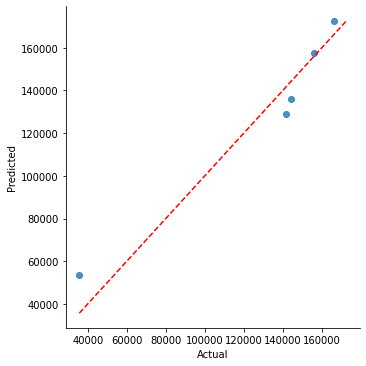

In [116]:
sns.lmplot(x='Actual', y='Predicted', data=df_results, fit_reg=False)
#Plot the diagonal line
d_line= np.arange(df_results.min().min(), df_results.max().max())
plt.plot(d_line, d_line, color='red', linestyle='--')
plt.show()

<b>Statsmodel Library</b>
<p>We can also use statsmodel library for prediction using regression:

In [117]:
import statsmodels.api as sm
df1 = df
df1 = sm.add_constant(df1)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [118]:
df1.head()

,const,RD_Spend,Administration,Marketing_Spend,State,Profit
0,1.0,165349.20,136897.80,471784.10,2,192261.83
1,1.0,162597.70,151377.59,443898.53,0,191792.06
2,1.0,153441.51,101145.55,407934.54,1,191050.39
3,1.0,144372.41,118671.85,383199.62,2,182901.99
4,1.0,142107.34,91391.77,366168.42,1,166187.94


In [121]:
X_df1= df1.iloc[:,[0,1,2,3,4]].values
Y_df1= df1.iloc[:,[5]].values
print('Shape of X:',X_df1.shape)
print('Shape of Y:',Y_df1.shape)

Shape of X: (50, 5)
Shape of Y: (50, 1)


In [123]:
X_df1_train, X_df1_test, Y_df1_train, Y_df1_test= train_test_split(X_df1,Y_df1,test_size=0.1,random_state=4)

In [125]:
reg_sm = sm.OLS(Y_df1_train, X_df1_train)
reg_sm = reg_sm.fit()
print(reg_sm.summary2())

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.944     
Dependent Variable: y                AIC:                954.1054  
Date:               2021-05-16 13:55 BIC:                963.1388  
No. Observations:   45               Log-Likelihood:     -472.05   
Df Model:           4                F-statistic:        186.2     
Df Residuals:       40               Prob (F-statistic): 2.80e-25  
R-squared:          0.949            Scale:              8.5159e+07
-------------------------------------------------------------------
            Coef.     Std.Err.    t    P>|t|    [0.025     0.975]  
-------------------------------------------------------------------
const     54846.9056 7762.9599  7.0652 0.0000 39157.3784 70536.4329
x1            0.8107    0.0513 15.7956 0.0000     0.7070     0.9145
x2           -0.0621    0.0581 -1.0689 0.2915    -0.1796     0.0553
x3            0.0201    0.0182  1.1031 0.2766    -0.0167     0.056

If our model was not satisfying we could have used influece plot to verify highly influencing rows and remove them before modelling again.</br>
Influence plot shown below:

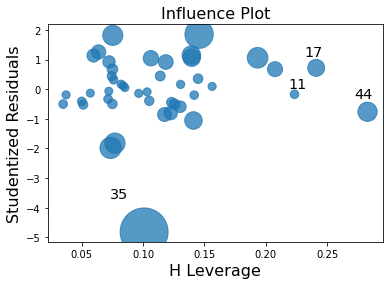

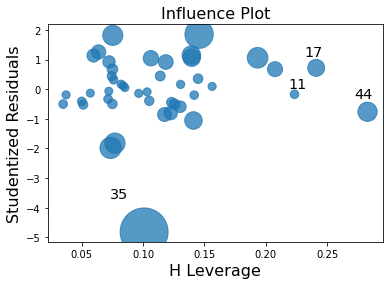

In [126]:
sm.graphics.influence_plot(reg_sm)

In [127]:
#As we can see row 35 is highly influencing the model and we can remove the row from our dataset 
#to see if results are improved or not.
X_new = np.delete(X_df1,[35],axis=0)
Y_new = np.delete(Y_df1,[35],axis=0)
print('X_new shape:',X_new.shape)
print('Y_new shape',Y_new.shape)

X_new shape: (49, 5)
Y_new shape (49, 1)


Now splitting the dataset modelling again 

In [128]:
X_new_train, X_new_test, Y_new_train, Y_new_test= train_test_split(X_new,Y_new,test_size=0.1,random_state=4)

In [129]:
reg_sm2 = sm.OLS(Y_new_train, X_new_train)
reg_sm2 = reg_sm2.fit()
print(reg_sm2.summary2())

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.944     
Dependent Variable: y                AIC:                933.8902  
Date:               2021-05-16 14:07 BIC:                942.8111  
No. Observations:   44               Log-Likelihood:     -461.95   
Df Model:           4                F-statistic:        182.0     
Df Residuals:       39               Prob (F-statistic): 1.16e-24  
R-squared:          0.949            Scale:              8.6899e+07
-------------------------------------------------------------------
            Coef.     Std.Err.    t    P>|t|    [0.025     0.975]  
-------------------------------------------------------------------
const     54181.7213 7982.3887  6.7877 0.0000 38035.8162 70327.6264
x1            0.8122    0.0520 15.6330 0.0000     0.7071     0.9173
x2           -0.0568    0.0599 -0.9484 0.3488    -0.1780     0.0644
x3            0.0200    0.0184  1.0859 0.2842    -0.0172     0.057

If this this not satisfying prediction results we can go ahead and try ridge,lasso,randomforest regression techniques.</br>
In our case we are satisfied with linear regression and will conclude the project here.

<b>Results</b></br>
Here we can say that our project is predicting profits with ~95% accuracy.
<p>This can be further used for all the new upcoming companies within these states and looking for investing the same departments to check their probable profits.